<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> Decicion Tree Classifier
 - <span style="color:dodgerblue;"> **Pros:**
   - <span style="color:black;"> Handling Imbalance ( class_weight={1:N} )
   - <span style="color:black;"> Fast Learner
   - <span style="color:black;"> Decision Tree Plot
 - <span style="color:deeppink;"> **Cons:**
   - <span style="color:black;"> Low Accuracy

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Objective:
 - To detect diabetes using Decision Tree Classifier and Ensemble Methods

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Libraries

In [50]:
import time, pickle
import pyts
import numpy  as np
from   numpy import mean, std

import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)

from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)
 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from imblearn.combine        import SMOTETomek, SMOTEENN
from imblearn.over_sampling  import SMOTE

from sklearn.impute          import KNNImputer 
from sklearn.ensemble        import IsolationForest

from sklearn.feature_selection import chi2

from sklearn.preprocessing   import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing   import MaxAbsScaler, PowerTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score

from sklearn.metrics         import accuracy_score, recall_score, precision_score
from sklearn.metrics         import classification_report, ConfusionMatrixDisplay

from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier 
from sklearn.tree            import plot_tree

from sklearn.ensemble        import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from imblearn.ensemble       import EasyEnsembleClassifier 

from sklearn.ensemble        import StackingClassifier, VotingClassifier

import warnings 
warnings.filterwarnings('ignore') 

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Importing Dataset

In [2]:
# (input) importing Raw data

data_set_name    = 'Pima_Diabetes'
estimated_column = 'Class'

data_file        = 'Pima_Diabetes.csv'
data_sheet       = 'Pima_Diabetes'

# needed parameters 
RANDOM_STATE     =  3
SCORING          = 'accuracy'

# (auto)
data = pd.read_csv( data_file, header=0 ) # , delimiter=','
print(f'there are {data.shape[0]} rows and {data.shape[1]} columns.')

there are 768 rows and 9 columns.


In [3]:
data.shape

(768, 9)

In [4]:
data.columns.to_list()

['Pregnancy',
 'Blood_Plasma',
 'Blood_Pressure',
 'Skin',
 'Test',
 'Body_Mass_Index',
 'Pedi',
 'Age',
 'Class']

In [5]:
data.dtypes

Pregnancy            int64
Blood_Plasma         int64
Blood_Pressure       int64
Skin                 int64
Test                 int64
Body_Mass_Index    float64
Pedi               float64
Age                  int64
Class                int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pregnancy        768 non-null    int64  
 1   Blood_Plasma     768 non-null    int64  
 2   Blood_Pressure   768 non-null    int64  
 3   Skin             768 non-null    int64  
 4   Test             768 non-null    int64  
 5   Body_Mass_Index  768 non-null    float64
 6   Pedi             768 non-null    float64
 7   Age              768 non-null    int64  
 8   Class            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.head()

,Pregnancy,Blood_Plasma,Blood_Pressure,Skin,Test,Body_Mass_Index,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.tail()

,Pregnancy,Blood_Plasma,Blood_Pressure,Skin,Test,Body_Mass_Index,Pedi,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
#np.random.seed(3)
cm = sns.light_palette('#ffcccb', as_cmap=True)

data.sample(n=10).style.\
    background_gradient(subset=['Class'], cmap=cm).\
    bar(subset=['Pregnancy','Test','Pedi'], color='deeppink').\
    bar(subset=['Blood_Plasma','Skin','Body_Mass_Index','Age'], color='cyan').\
    bar(subset=['Blood_Pressure'], color='deeppink').\
    highlight_null(color='lime').\
    format(precision=2).\
    hide(axis="index")       #.to_excel('styled.xlsx', engine='openpyxl')

Pregnancy,Blood_Plasma,Blood_Pressure,Skin,Test,Body_Mass_Index,Pedi,Age,Class
7,179,95,31,0,34.20,0.16,60,0
10,129,62,36,0,41.20,0.44,38,1
9,145,80,46,130,37.90,0.64,40,1
10,115,0,0,0,0.00,0.26,30,1
5,117,86,30,105,39.10,0.25,42,0
9,152,78,34,171,34.20,0.89,33,1
9,170,74,31,0,44.00,0.40,43,1
8,109,76,39,114,27.90,0.64,31,1
1,109,60,8,182,25.40,0.95,21,0
0,104,64,37,64,33.60,0.51,22,1


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
 - **All** features are **numeric**.
 - As **none** of features are of type **object**, **null values** are NOT in text form (e.g. '?', 'unknown', ' ', ...) which is great. 

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Studying the data distribution in each attribute

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Performing Descriptive Statistics

In [10]:
data.describe().T.style.format(precision=1)   

,count,mean,std,min,25%,50%,75%,max
Pregnancy,768.0,3.8,3.4,0.0,1.0,3.0,6.0,17.0
Blood_Plasma,768.0,120.9,32.0,0.0,99.0,117.0,140.2,199.0
Blood_Pressure,768.0,69.1,19.4,0.0,62.0,72.0,80.0,122.0
Skin,768.0,20.5,16.0,0.0,0.0,23.0,32.0,99.0
Test,768.0,79.8,115.2,0.0,0.0,30.5,127.2,846.0
Body_Mass_Index,768.0,32.0,7.9,0.0,27.3,32.0,36.6,67.1
Pedi,768.0,0.5,0.3,0.1,0.2,0.4,0.6,2.4
Age,768.0,33.2,11.8,21.0,24.0,29.0,41.0,81.0
Class,768.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report:
 - Features: 'Blood_Plasma', 'Blood_Pressure', 'Skin', 'Test', 'Body_Mass_Index' 
   - include 0 which is impossible, and means missing value
 - These 0s must be converted to np.nan

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Converting 0s to np.nan

In [11]:
Features_with_Missing_Values = ['Blood_Plasma', 'Blood_Pressure', 'Skin', 'Test', 'Body_Mass_Index']

df = data.copy()
for ft in Features_with_Missing_Values:
    df[ft] = df[ft].replace(0,np.nan)

In [12]:
df.sample(10).style.\
    highlight_null(color='lime').\
    format(precision=2).\
    hide(axis="index")       #.to_excel('styled.xlsx', engine='openpyxl')

Pregnancy,Blood_Plasma,Blood_Pressure,Skin,Test,Body_Mass_Index,Pedi,Age,Class
4,128.00,70.00,nan,nan,34.30,0.30,24,0
5,117.00,92.00,nan,nan,34.10,0.34,38,0
0,135.00,94.00,46.00,145.00,40.60,0.28,26,0
0,100.00,70.00,26.00,50.00,30.80,0.60,21,0
1,117.00,88.00,24.00,145.00,34.50,0.40,40,1
0,101.00,62.00,nan,nan,21.90,0.34,25,0
0,84.00,82.00,31.00,125.00,38.20,0.23,23,0
1,153.00,82.00,42.00,485.00,40.60,0.69,23,0
1,151.00,60.00,nan,nan,26.10,0.18,22,0
1,97.00,68.00,21.00,nan,27.20,1.09,22,0


In [13]:
data = df.copy()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Feature Selection - Variation of Distributions ( Variance or Standard Deviation )
 - Good Variance > 0.1
 - Good STD > 0.3

In [14]:
df = data.std().sort_values(ascending=False)
df

Test               118.775855
Blood_Plasma        30.535641
Blood_Pressure      12.382158
Age                 11.760232
Skin                10.476982
Body_Mass_Index      6.924988
Pregnancy            3.369578
Class                0.476951
Pedi                 0.331329
dtype: float64

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
 - The feature **Pedi** has very low variation in distribution. Thus it has little use and should be removed.
 - The feature **Class** also has low variation which suggests count of one of the classes prevails the rest, but, as it is the **tatget columns**, it will be kept.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Sorting Features Based on Variation

In [15]:
data = data[ list( df.index ) ]

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Dropping the feature 'Pedi'

In [16]:
data.drop(['Pedi'],axis=1,inplace=True)
data.columns.to_list()

['Test',
 'Blood_Plasma',
 'Blood_Pressure',
 'Age',
 'Skin',
 'Body_Mass_Index',
 'Pregnancy',
 'Class']

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Studying Histogram of Features

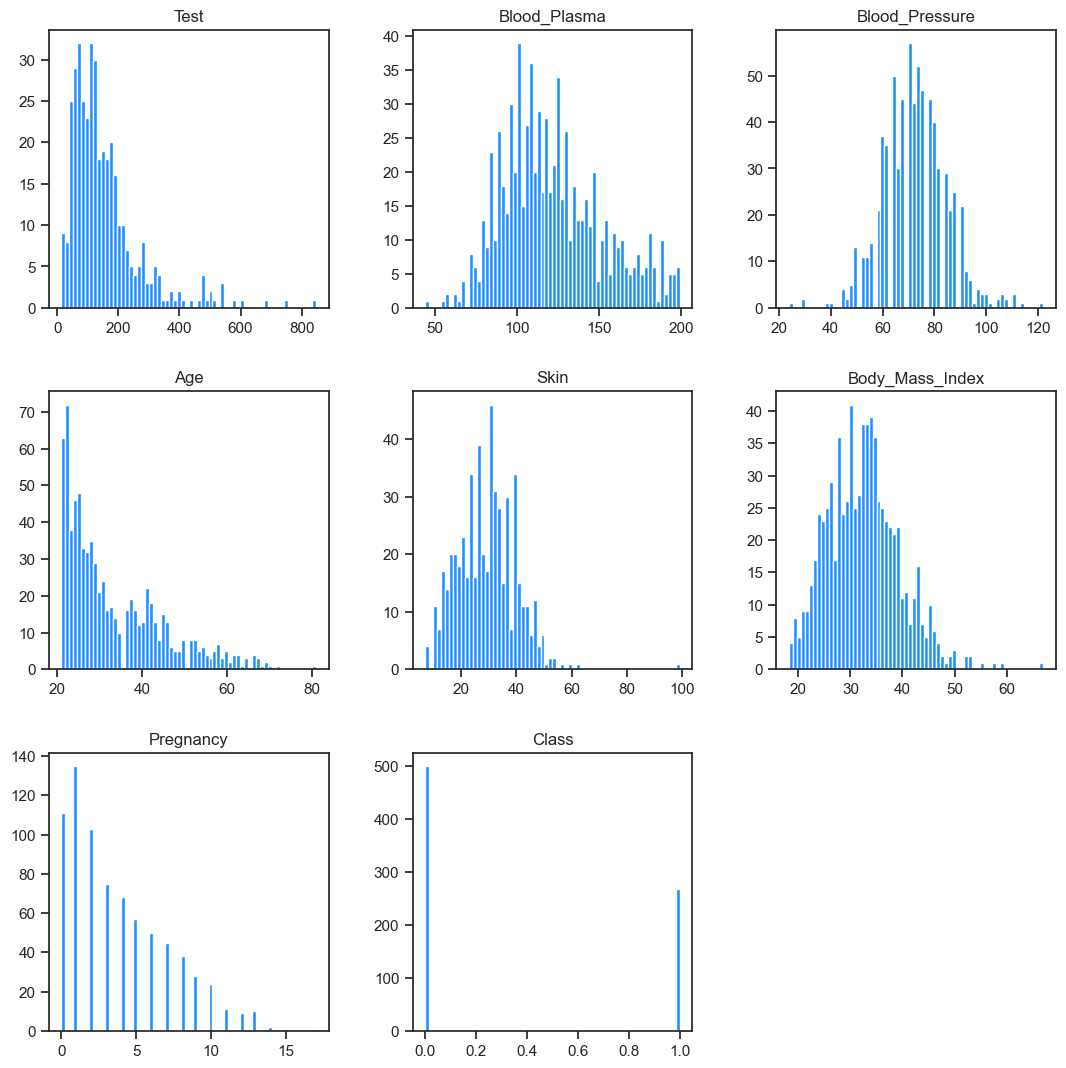

In [17]:
data.hist(bins=64,grid=False,color='dodgerblue',figsize=(13,13)); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
 - Notable **Skewness** is observed in histogram of features **Skin**, **Test**, **Body_Mass_Index** and **Age** which suggests existence of outliers.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Shape Parameters: Skewness and Kurtosis

In [18]:
SKEW = data.skew() 
KURT = data.kurt() 

Shape_Parameters = pd.DataFrame([KURT,SKEW]).T
Shape_Parameters.columns = ['Kurtosis','Skewness']
Shape_Parameters.sort_values(['Kurtosis','Skewness'],ascending=[False,False],inplace=True)
Shape_Parameters

,Kurtosis,Skewness
Test,6.370522,2.166464
Skin,2.935491,0.690619
Blood_Pressure,0.911158,0.134153
Body_Mass_Index,0.863379,0.593970
Age,0.643159,1.129597
Pregnancy,0.159220,0.901674
Blood_Plasma,-0.277040,0.530989
Class,-1.600930,0.635017


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
 - **Test** has a very thick tail at right. Most possibly extreme outliers exist.
 - **Skin** has a thick tail at the right. Most possibly many outliers exist.
 - **Blood_Pressure**, **Body_Mass_Index** and **Age** have a thick tail at right. Possibly many outliers exist.
 - **Pregnancy** has a tail at right. Possibly some outliers exist.     
    
 - All other features have **negative kurtosis** which suggest no tail, thus no outliers.
 - **Blood_Plasma** and **Class** have some skewness to the right. which suggest imbalanced distribution of records, not outliers.

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Distribution of Target Column

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Distribution Visualization

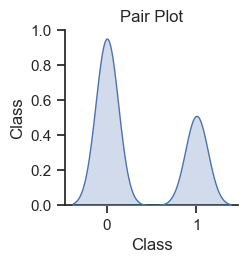

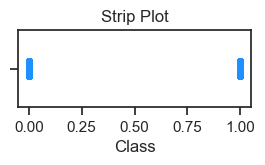

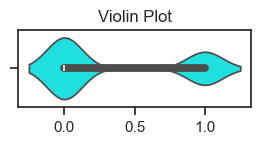

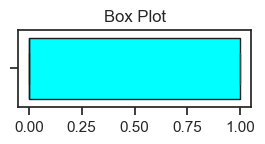

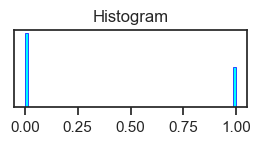

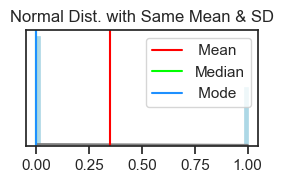

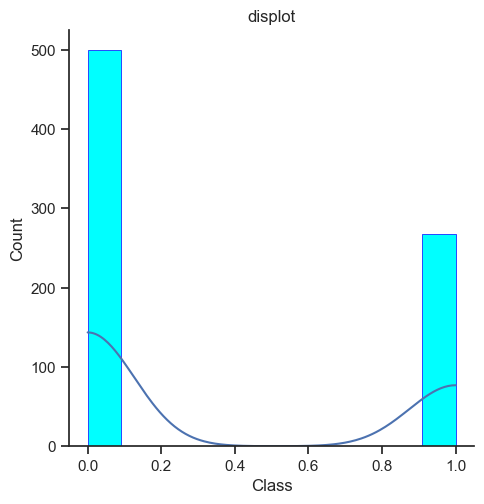

In [19]:
ft = 'Class'
L  = data[ft].copy()

# pair-plot
sns.pairplot( data[[ft]], diag_kind='kde' ) 
plt.title('Pair Plot')
plt.show()

# strip-plot
plt.figure(  figsize=(3,1)  )
sns.stripplot( data=data, x=ft, color='dodgerblue' )
plt.title('Strip Plot')
plt.show()

# ViolinPlot
plt.figure(  figsize=(3,1)  )
sns.violinplot( x=L
              , color = 'cyan'
              )
plt.title('Violin Plot')
plt.xlabel('')  
plt.xlabel('')
plt.show()

# BoxPlot
boxprops    = dict( edgecolor = 'k', facecolor  = 'cyan', linewidth = 1 )
medianprops = dict( color     = 'k', linewidth  = 1  )
flierprops  = dict( marker    = 'd', markersize = 7, markerfacecolor = 'red', markeredgecolor = 'red' ) 
                  
plt.figure(  figsize=(3,1)  )
sns.boxplot( x=L
           , boxprops    = boxprops
           , medianprops = medianprops
           , flierprops  = flierprops  
           )
plt.title('Box Plot')
plt.xlabel('') 
plt.show()

# Histogram: 
fig, ax = plt.subplots( figsize=(3,1) )
ax.hist( L, density=True, bins=64, linewidth=.5, edgecolor='blue', facecolor='cyan' )
ax.set_yticks([])
plt.title('Histogram')
plt.show()

# Density Curve:
from scipy.stats import norm 
h = sorted( np.asarray(L) ) 
fit = norm.pdf( h, np.mean(h), np.std(h) )
fig, ax = plt.subplots( figsize=(3,1.5) )
ax.plot( h, fit, color='gray', linestyle='-', linewidth=1.5 )
ax.hist( L, density=True, bins=64, linewidth=.5, edgecolor='lightblue', facecolor='lightblue' )
Mean = L.mean()
Median = L.median()
Mode = L.mode() 
plt.axvline(Mean,color='red',linewidth=1.5,label=' Mean')
plt.axvline(Median,color='lime',linewidth=1.5,label='Median')
for i in range(len(Mode)): plt.axvline(Mode[i],color='dodgerblue',linewidth=1.5,label=' Mode')
ax.set_yticks([]) 
ax.legend()
plt.title('Normal Dist. with Same Mean & SD')
plt.show()

# displot:
sns.displot(data=data, x=ft, kde=True, linewidth=.5, edgecolor='blue', facecolor='cyan')
plt.title('displot')
plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
 - Visually, it is observed that the **Target Column** has an **Imbalanced Distribution**

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Counting Subcats

In [20]:
data['Class'].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
 - Distribution of **Class** is **Imbalaned**, Possibly some classifiers demonstrate extremely week performance in detecting **class 1** which is in minority.

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Pre-Porocessing

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Handling Duplicates

In [21]:
print('Before Treatment:\nn duplicates =', sum(data.duplicated())) 

Before Treatment:
n duplicates = 0


In [22]:
if sum( data.duplicated() ) > 0:
    data = data.drop_duplicates()
    data.index = range( data.shape[0] )
print('After Treatment:\nn duplicates =', sum(data.duplicated())) 

After Treatment:
n duplicates = 0


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Handling Missing Values by KNNImputer

In [23]:
print('Before Treatment:\n', pd.DataFrame(data.isnull().sum(), columns=['Number of Missing Values'])) 

Before Treatment:
                  Number of Missing Values
Test                                  374
Blood_Plasma                            5
Blood_Pressure                         35
Age                                     0
Skin                                  227
Body_Mass_Index                        11
Pregnancy                               0
Class                                   0


In [24]:
imputer = KNNImputer( n_neighbors=5, weights="distance" )   # data.fillna( data.median(), inplace=True )
Imputed_Values = imputer.fit_transform( data.values )
data = pd.DataFrame( Imputed_Values, columns=data.columns )
print('After Treatment:\n', pd.DataFrame(data.isnull().sum(), columns=['Number of Missing Values'])) 

After Treatment:
                  Number of Missing Values
Test                                    0
Blood_Plasma                            0
Blood_Pressure                          0
Age                                     0
Skin                                    0
Body_Mass_Index                         0
Pregnancy                               0
Class                                   0


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Handling Outliers

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Detecting Outliers by Boxplots

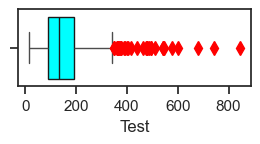

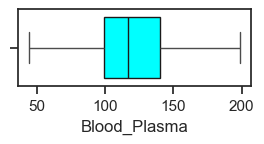

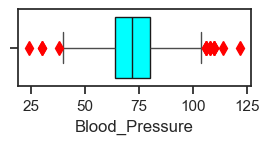

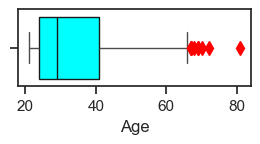

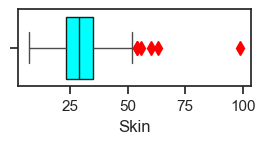

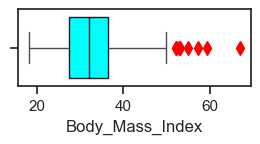

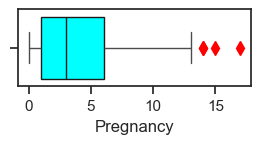

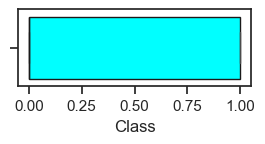

In [25]:
df = data.copy()

scalar_columns = []
for col in df.columns:
    if df[col].dtype!='object': scalar_columns.append( col )

boxprops    = dict( linewidth=1, edgecolor='k', facecolor='cyan' )
medianprops = dict( linewidth=1, color='k' )
flierprops  = dict( marker='d', markersize=7, markerfacecolor='red', markeredgecolor='red' )

for ft in scalar_columns:
    plt.figure(  figsize=(3,1)   )
    sns.boxplot( x=df[ ft ] 
           , boxprops    = boxprops
           , medianprops = medianprops
           , flierprops  = flierprops  
           )
    plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Winsorizing Extreme Outliers by Z-Score

In [26]:
# Winsorizing Extreme Outliers
df_dirty = data.copy()    
columns_with_outliers = [ 'Pregnancy', 'Blood_Pressure', 'Skin', 'Test', 'Body_Mass_Index', 'Age' ]

def winsorize_by_zscore(df,ft):
    x  = df[ft].copy()
    M  = x.mean()
    SD = x.std()
    z  = (x-M) / SD
    
    upper_bound = +3
    lower_bound = -3
    
    ls = df.index[ (z > upper_bound) 
                 | (z < lower_bound) ]
    
    x_Des=sorted(x,reverse=True)
    i=0
    while x_Des[i] >=  M + 3*SD:
        i=i+1 
    MAX=x_Des[i] 
    
    x_Asc=sorted(x,reverse=False)
    i=0 
    while x_Asc[i] <=  M - 3*SD:
        i=i+1  
    MIN=x_Asc[i] 
    
    for i in range(0,len(x)):
        if   z[i] > upper_bound: x[i]=MAX
        elif z[i] < lower_bound: x[i]=MIN
            
    return [x, ls]
 

# df_no_extreme
df = df_dirty.copy()

index_list = []
for c in columns_with_outliers:
    c_clean, ls = winsorize_by_zscore( df_dirty, c )
    index_list.extend( ls )
    df.loc[ :, c ] = c_clean

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Checking

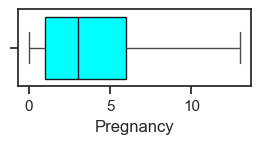

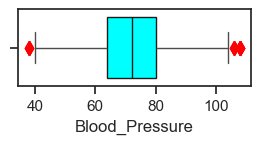

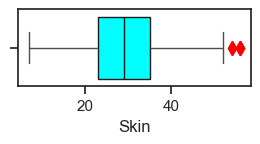

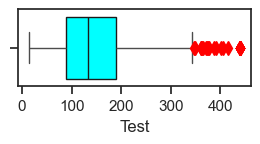

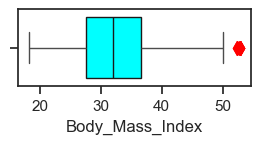

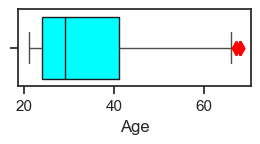

In [27]:
# Detecting Outliers by Boxplots 
for ft in columns_with_outliers:
    plt.figure(  figsize=(3,1)   )
    sns.boxplot( x=df[ ft ] 
           , boxprops    = boxprops
           , medianprops = medianprops
           , flierprops  = flierprops  
           )
    plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Assigning

In [28]:
data = df.copy()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Treating Noise (Outliers) by AODs
 - Isolation Forest

In [29]:
df_dirty = data.copy()    

X   = df_dirty[ scalar_columns ].values.copy()
AOD = IsolationForest( contamination=0.05 ).fit( X )
flag_clean = AOD.predict( X ) == +1
df_clean   = df_dirty.loc[ flag_clean, : ]
df_clean.index = range(df_clean.shape[0])

df = df_clean.copy()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Observing Noise (Outliers) Before Vs After Treating by AODs

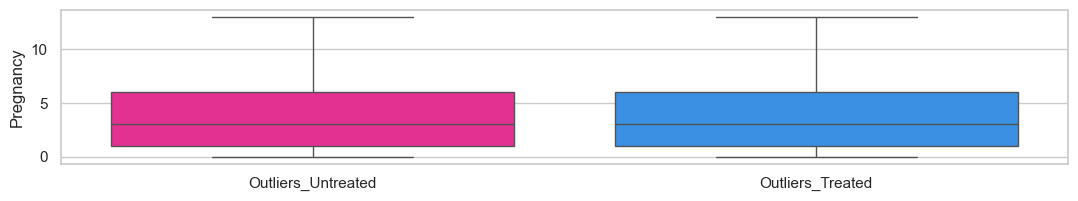

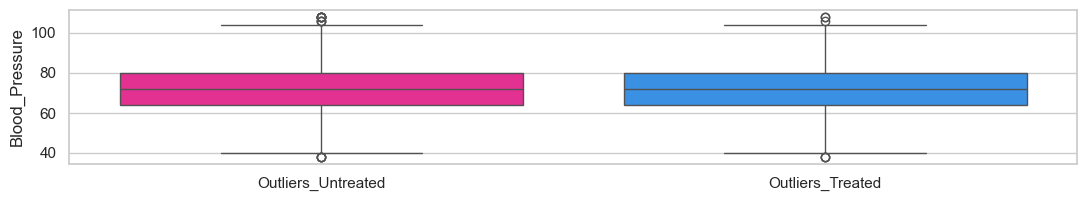

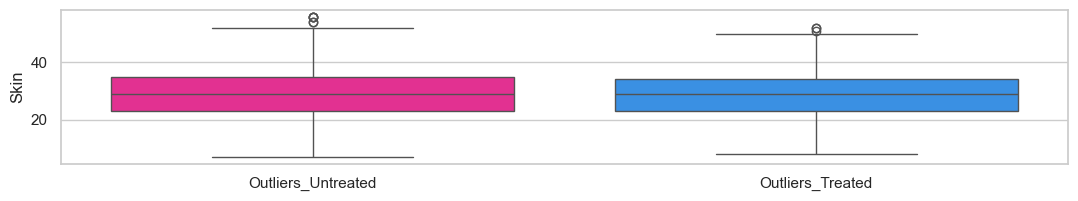

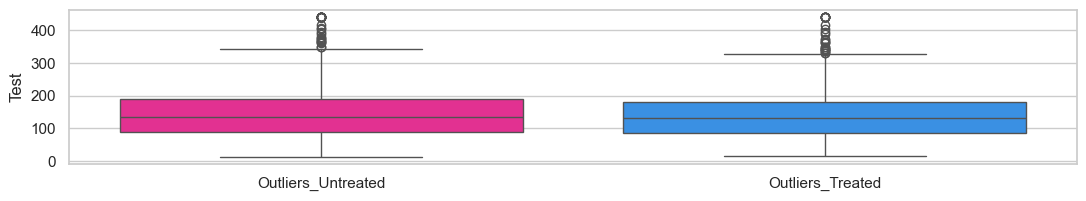

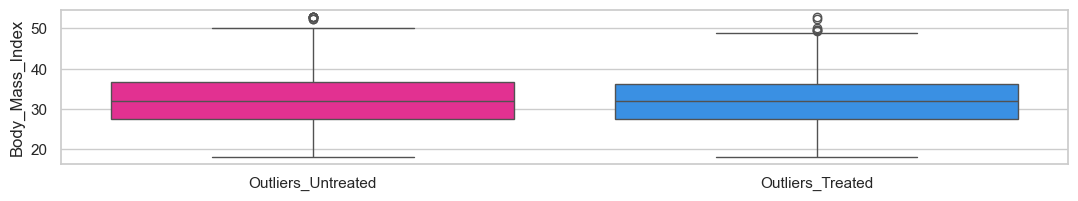

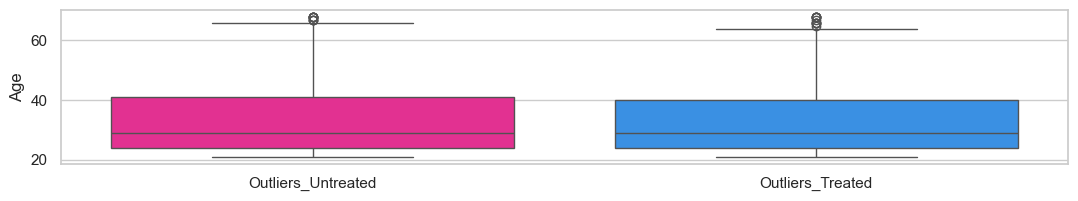

In [30]:
df_before = data.copy()
df_before['condition']=['Outliers_Untreated']*df_before.shape[0]
df_after  = df.copy()
df_after['condition'] =['Outliers_Treated']*df_after.shape[0]
df_before_after = pd.concat([df_before,df_after],axis=0)
df_before_after.head()

x   = 'condition'
for y in columns_with_outliers:
    Xy = df_before_after[ [x,y] ].copy().dropna().sort_values([x],ascending=[False]) 
    # BoxPlot
    sns.set(rc={'figure.figsize':(13,2)}); sns.set(style='whitegrid')
    sns_plot = sns.boxplot( x=x, y=y, data=Xy, linewidth=1.0, palette=['deeppink','dodgerblue']); sns_plot.set_xlabel('')
    fig = sns_plot.get_figure(); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Feature Selection - Heat-Map of Correlations
 - As the data is cleaned, **Pearson's r** correlation method can be used.

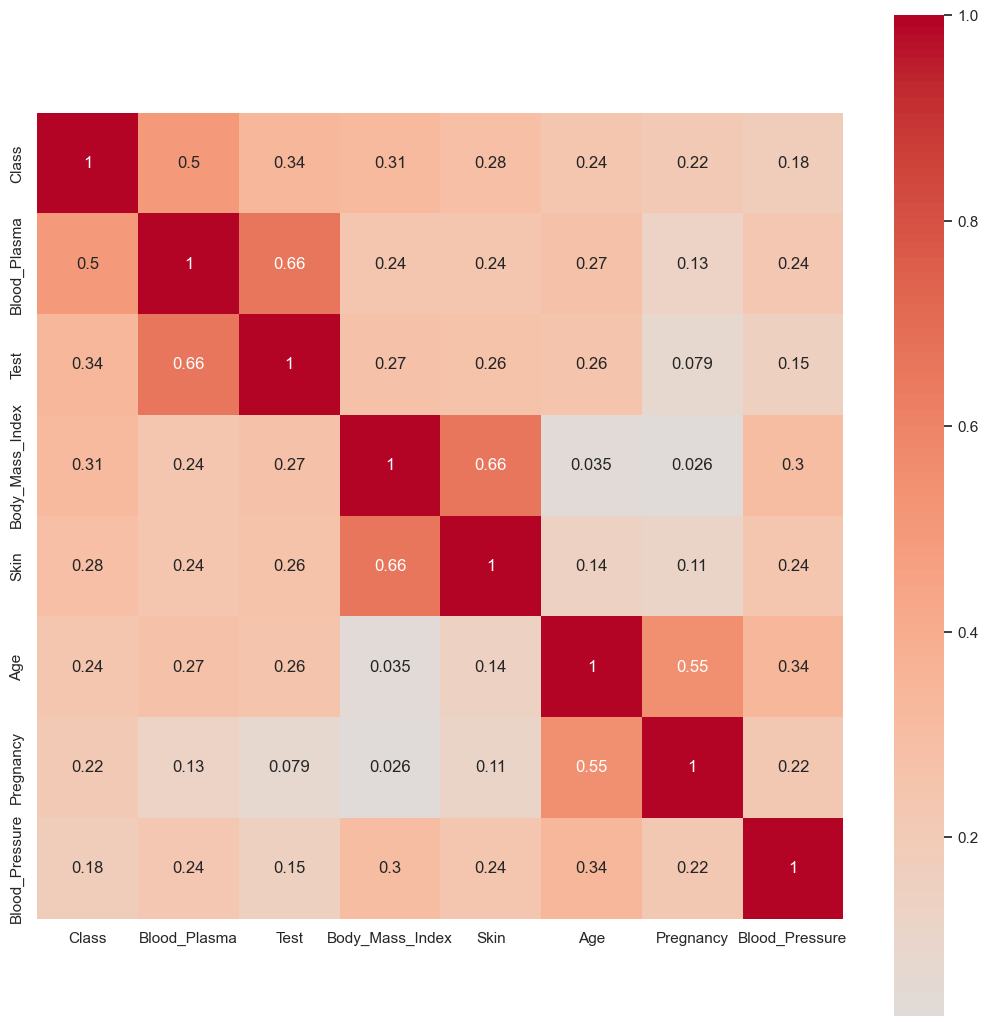

In [31]:
Corr = data.corr('pearson')
Corr.sort_values(['Class'],ascending=[False],inplace=True)
Corr = Corr.T
Corr.sort_values(['Class'],ascending=[False],inplace=True)

fig,ax = plt.subplots(figsize=(13,13))
sns_plot = sns.heatmap( Corr, mask=np.zeros_like(Corr,dtype=bool), 
                        cmap='coolwarm',
                        square=True, ax=ax, annot=True, center=0.00 )
plt.show()

In [32]:
Threshhold = 0.01

strongly_correlated = list( Corr[ Corr['Class']> 0.70 ].index )
weakly_correlated   = list( Corr[ Corr['Class']< Threshhold ].index )

print( '\n strongly-correlated features: \n', strongly_correlated )
print( '\n weakly-correlated features: \n', weakly_correlated )


 strongly-correlated features: 
 ['Class']

 weakly-correlated features: 
 []


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report
    
 - Correlation of any feature to **Target Column: Class** is less than 70%
 - **linear models** **( LinearSVC, LogisticRegression, PassiveAggressive, Perceptron, Ridge, SGD, SGDOneClassSVM )**, 
   will have weak performane.
 - **Nonlinear Models** like **Decision Tree** Should be used.
** **
 - None of features are less than 1% correlated to **Target Column: Class** and can be kept.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Sorting Features Based on Correlation

In [33]:
data = data[ list(Corr.columns) ]

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Dropping Weakly-Correlated Features

In [34]:
data.drop( weakly_correlated, axis=1, inplace=True )
data.columns.to_list()

['Class',
 'Blood_Plasma',
 'Test',
 'Body_Mass_Index',
 'Skin',
 'Age',
 'Pregnancy',
 'Blood_Pressure']

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Feature Selection - Chi-Squared Test

In [35]:
df = data.copy()

X = df.drop([estimated_column],axis=1) 
y = df[estimated_column]
X_pvals = chi2(X,y)

# feature p values
# p value <= 0.05  means  strong feature
ft_pvals = pd.Series( X_pvals[1] )
ft_pvals.index = X.columns

# important & unimportant features
important_features   = list( ft_pvals[ft_pvals<=0.05].sort_values( ascending=True ).index )
unimportant_features = list( ft_pvals[ft_pvals> 0.05].sort_values( ascending=True ).index )

print( '\nChi-Squares P-Value Results:\n' )
print( (pd.DataFrame(ft_pvals,columns=['P_Value'])).sort_values(['P_Value']) )
print( '\n  Important_features:',   important_features )
print( '\nUnImportant_features:', unimportant_features )


Chi-Squares P-Value Results:

                      P_Value
Blood_Plasma     0.000000e+00
Test             0.000000e+00
Age              9.024823e-42
Skin             1.508829e-39
Pregnancy        3.281155e-25
Body_Mass_Index  5.258731e-25
Blood_Pressure   2.479930e-12

  Important_features: ['Blood_Plasma', 'Test', 'Age', 'Skin', 'Pregnancy', 'Body_Mass_Index', 'Blood_Pressure']

UnImportant_features: []


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Findings Report 
 - All Features Pass the Chi-Squared Test and are Important

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Dropping Unimportant Features

In [36]:
data.drop( unimportant_features, axis=1, inplace=True )
data.columns.to_list()

['Class',
 'Blood_Plasma',
 'Test',
 'Body_Mass_Index',
 'Skin',
 'Age',
 'Pregnancy',
 'Blood_Pressure']

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Pair-Plot

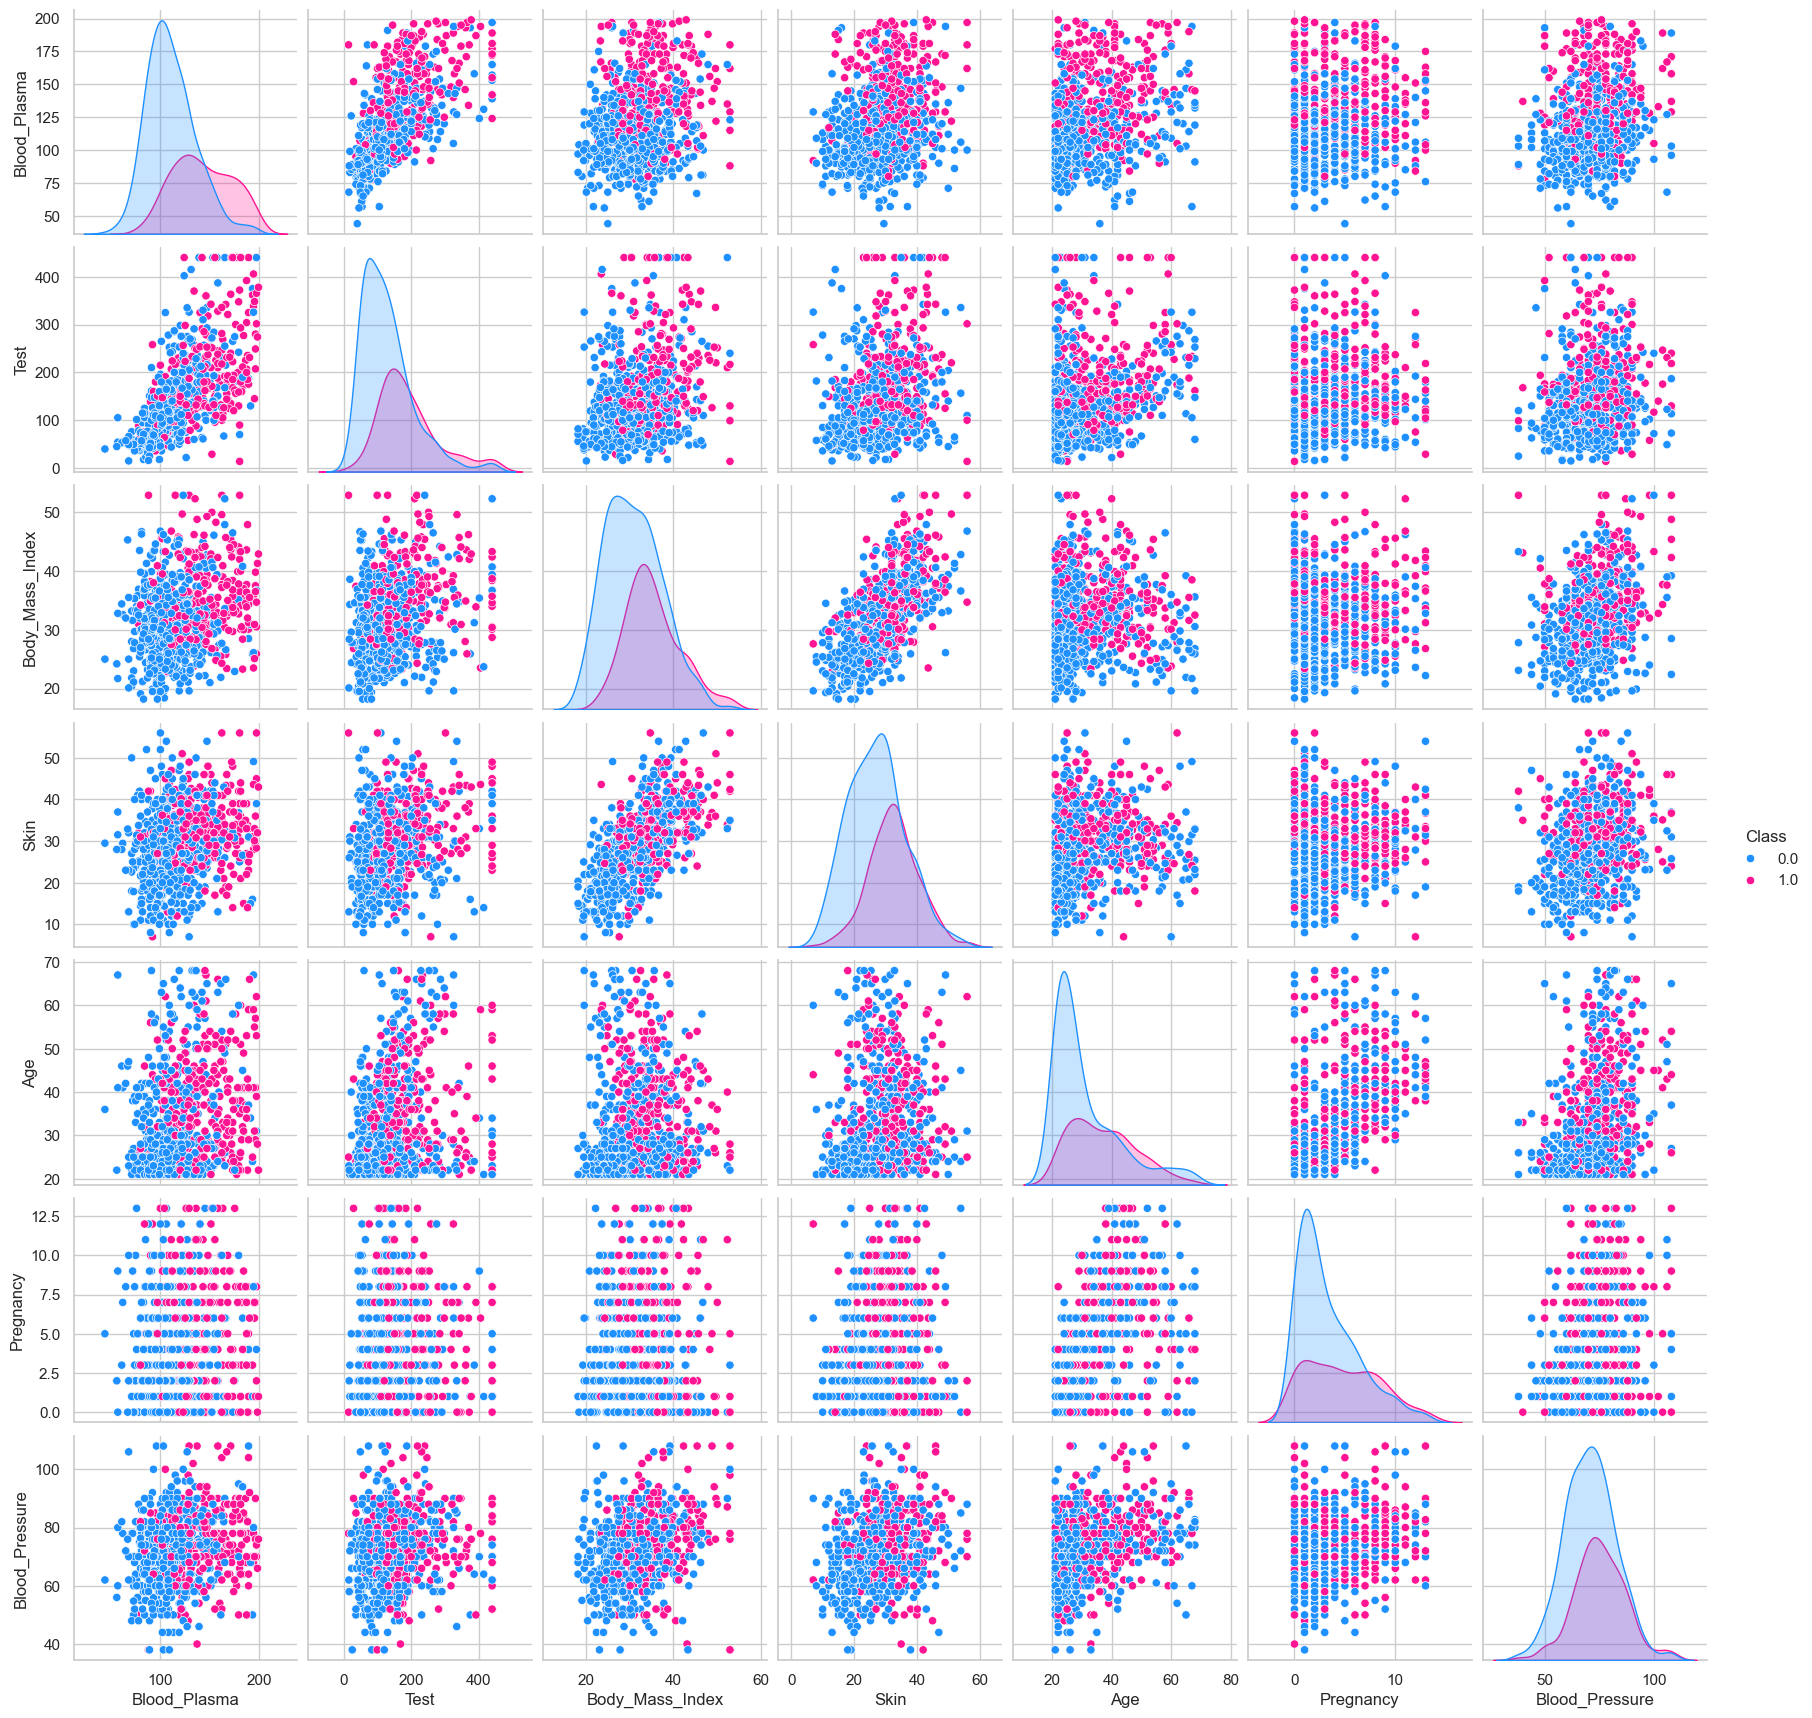

In [37]:
sns.pairplot( data, hue='Class', diag_kind='kde', palette=['dodgerblue','deeppink'] ); plt.show()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Splitting the data into training, validation and test set in the ratio of 60:20:20 respectively.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Splitting into X and y

In [38]:
X = data.drop([estimated_column], axis=1).copy()  # X_df = data.loc[ :, data.columns != 'Personal Loan' ]  
y = data[estimated_column].copy()                 # y_df = data.loc[ :, data.columns == 'Personal Loan' ]  
y = LabelEncoder().fit_transform( y )

In [39]:
X.shape

(768, 7)

In [40]:
y.shape

(768,)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Splitting into Train, Valid and Test Sets

In [41]:
X_Train, X_ValidTest, y_Train, y_ValidTest  =  train_test_split(        
          X, y
        , random_state  =  RANDOM_STATE
        , test_size     =  30/100
        , shuffle       =  True 
        , stratify      =  y
        )
X_Train.index      = range( X_Train.shape[0] )
X_ValidTest.index  = range( X_ValidTest.shape[0]        ) 

X = X_ValidTest
y = y_ValidTest

X_Valid, X_Test, y_Valid, y_Test  =  train_test_split(        
          X, y
        , random_state  =  RANDOM_STATE
        , test_size     =  50/100
        , shuffle       =  True 
        , stratify      =  y
        )
X_Valid.index = range( X_Valid.shape[0] )
X_Test.index  = range( X_Test.shape[0]  ) 

In [45]:
X_Train.shape

(537, 7)

In [43]:
X_Valid.shape

(115, 7)

In [44]:
X_Test.shape

(116, 7)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Counting Subcats of Sets

In [46]:
pd.crosstab( y_Train, columns='Subcat-Count' )  

col_0,Subcat-Count
row_0,
0,350
1,187


In [47]:
pd.crosstab( y_Valid, columns='Subcat-Count' )  

col_0,Subcat-Count
row_0,
0,75
1,40


In [48]:
pd.crosstab( y_Test, columns='Subcat-Count' )  

col_0,Subcat-Count
row_0,
0,75
1,41


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Checking Imbalance in Data

col_0  count
Class       
0.0      500
1.0      268


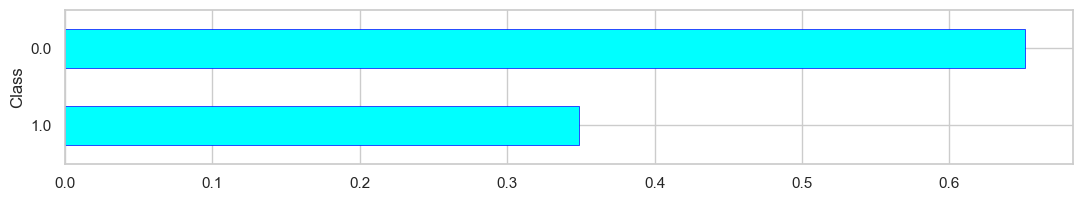

In [49]:
df = data.copy()
x  = estimated_column

# Frequency Table  
freq_tab = pd.crosstab( index=df[x].astype('str'), columns='count' )
print(freq_tab.sort_values('count',ascending=False))

# Barh
L = df[x].astype('str')
L.value_counts(normalize=True).sort_values().plot.barh(linewidth=.5, edgecolor='blue', facecolor='cyan'); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - Data is **Imbalanced** and needs treatment.

** **

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:red;"> Mistreating Imbalance

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:red;"> Mistreating Imbalance by SMOTETomek

In [51]:
Sampler = SMOTE( sampling_strategy='auto', k_neighbors=5, random_state=RANDOM_STATE )

X_Train_Balanced, y_Train_Balanced = Sampler.fit_resample( X_Train, y_Train )
X_Train_Balanced.index = range(X_Train_Balanced.shape[0])

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:red;"> Checking Balanced Data

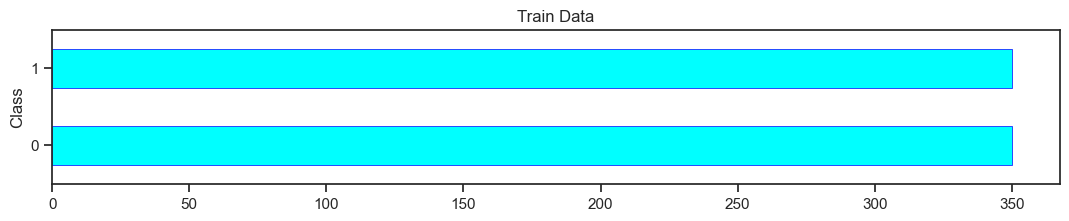

In [52]:
x = estimated_column

df_Train_Balanced      = X_Train_Balanced.copy()
df_Train_Balanced[ x ] = y_Train_Balanced.copy() 

# Train Data
df = df_Train_Balanced.copy() 
L  = df[x].astype('str')
L.value_counts(normalize=False).sort_values().plot.barh(linewidth=.5, edgecolor='blue', facecolor='cyan',title='Train Data'); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - After Mistreatment, Data is **Balanced**

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:red;"> Warning: 
 - Although Mistreated Data looks Charming and Tempting, unfortunately, the models trained by them are overfit and have weak performance.
 - A better solution to overcome the imbalance, is to train the models with the imbalanced data, and boost them via gradient-boost.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:red;"> (NOT) Assigning 

In [53]:
X_Train = X_Train_Balanced.copy()
y_Train = y_Train_Balanced.copy()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Saving Data Sets

In [51]:
from openpyxl       import Workbook
from openpyxl.utils import get_column_letter
from openpyxl       import load_workbook

wb = Workbook()
dest_filename = 'DataSets.xlsx'
Empty = wb.active; Empty.title='Empty'     


XX = data.values.copy() 
DATA = wb.create_sheet('DATA')
DATA.append( list(data.columns) )
for i in range( XX.shape[0] ): DATA.append( list( XX[i,:] )  )

    
XX = X_Train.values.copy()    
xTrain = wb.create_sheet('xTrain')
xTrain.append( list(X_Train.columns) )
for i in range( XX.shape[0] ): xTrain.append( list( XX[i,:] )  )
                                                  
YY = y_Train.copy()    
yTrain = wb.create_sheet('yTrain')
yTrain.append( [estimated_column,estimated_column] )
for i in range( YY.shape[0] ): yTrain.append([  YY[i], YY[i]  ])

    
XX = X_Valid.values.copy()    
xValid = wb.create_sheet('xValid')
xValid.append( list(X_Valid.columns) )
for i in range( XX.shape[0] ): xValid.append( list( XX[i,:] )  )
                                                  
YY = y_Valid.copy()    
yValid = wb.create_sheet('yValid')
yValid.append( [estimated_column,estimated_column] )
for i in range( YY.shape[0] ): yValid.append([  YY[i], YY[i]  ])

    
XX = X_Test.values.copy()    
xTest = wb.create_sheet('xTest')
xTest.append( list(X_Test.columns) )
for i in range( XX.shape[0] ): xTest.append( list( XX[i,:] )  )
                                                  
YY = y_Test.copy()    
yTest = wb.create_sheet('yTest')
yTest.append( [estimated_column,estimated_column] )
for i in range( YY.shape[0] ): yTest.append([  YY[i], YY[i]  ])


# Saving    
wb.save( filename = dest_filename )   

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Data Sets

In [52]:
DataSet = 'DataSets.xlsx'

data    =           pd.read_excel( DataSet, 'DATA'  , header=0 )

X_Train =           pd.read_excel( DataSet, 'xTrain', header=0 )
y_Train = np.array( pd.read_excel( DataSet, 'yTrain', header=0 ).iloc[:,0] )

X_Valid =           pd.read_excel( DataSet, 'xValid', header=0 )
y_Valid = np.array( pd.read_excel( DataSet, 'yValid', header=0 ).iloc[:,0] )

X_Test  =           pd.read_excel( DataSet, 'xTest' , header=0 )
y_Test  = np.array( pd.read_excel( DataSet, 'yTest' , header=0 ).iloc[:,0] )

** **

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Scaling

In [56]:
Scaler0 = None
Scaler1 = StandardScaler()    # z-score
Scaler2 = MinMaxScaler()      # 0  1
Scaler3 = MaxAbsScaler()      # 0+ 1
Scaler4 = PowerTransformer()
Scaler5 = FunctionTransformer(np.log1p)
Scaler6 = FunctionTransformer(np.exp)

Scaler  = Scaler1

if Scaler == None:
    X_Train_Scaled = X_Train.copy()
    X_Valid_Scaled = X_Valid.copy()
    X_Test_Scaled  = X_Test.copy()
else:
    Scaler.fit(X_Train)                          # fit
    pickle.dump( Scaler,  open('Scaler','wb') )  # save
    Scaler = pickle.load( open('Scaler','rb') )  # load
    X_Train_Scaled = pd.DataFrame( Scaler.transform(X_Train), columns=X_Train.columns )
    X_Valid_Scaled = pd.DataFrame( Scaler.transform(X_Valid), columns=X_Valid.columns )
    X_Test_Scaled  = pd.DataFrame( Scaler.transform(X_Test),  columns=X_Test.columns  )

In [58]:
X_Train_Scaled.sample(3)

,Blood_Plasma,Test,Body_Mass_Index,Skin,Age,Pregnancy,Blood_Pressure
427,-0.222061,-0.258611,0.445597,1.233222,-0.829462,-0.327587,-1.727468
34,0.850705,3.327700,0.856017,-0.314363,-0.829462,-0.624943,-1.727468
244,-0.569132,-0.186041,0.688809,0.028069,-0.400646,-0.030231,1.546282


In [59]:
X_Valid_Scaled.sample(3)

,Blood_Plasma,Test,Body_Mass_Index,Skin,Age,Pregnancy,Blood_Pressure
54,-0.821548,-0.103269,-0.344843,0.010494,0.113933,0.564480,0.727845
17,-0.916203,-0.570643,-1.226488,-1.477080,-1.086752,-1.219654,-0.862398
110,0.156562,-0.382614,1.084029,0.314373,0.199696,0.861835,0.891532


In [60]:
X_Test_Scaled.sample(3)

,Blood_Plasma,Test,Body_Mass_Index,Skin,Age,Pregnancy,Blood_Pressure
115,1.040016,0.851757,-1.697711,-0.477484,2.601065,-1.219654,-1.891156
45,-0.916203,-0.771656,-1.287291,-1.724295,-1.172515,-0.624943,-1.727468
91,0.850705,3.327700,0.141581,-0.431857,0.971565,1.159191,-0.909031


** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Base-Line

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Finding The Class_Weight
 - A **Class_Weight** is calculated and inserted in Estimators to compensate for **Data Imbalance**.

In [62]:
df = pd.DataFrame([y_Train,y_Train]).T
df.columns = [estimated_column,'del']
df.index = np.arange( df.shape[0] )

freq_tab = pd.crosstab( index=df[estimated_column].astype('str'), columns='count' )
CLASS_WEIGHT = max(freq_tab['count'])/min(freq_tab['count'])
CLASS_WEIGHT

1.0

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Making A Base-Line for DTree Estimators

In [63]:
DTree_BaseLine = DecisionTreeClassifier( class_weight = {1:CLASS_WEIGHT}
                                       , random_state =   RANDOM_STATE 
                                       ).fit( X_Train_Scaled, y_Train )
print( '\nDTree_BaseLine Parameters: \n\n', DTree_BaseLine.get_params(), '\n' )


DTree_BaseLine Parameters: 

 {'ccp_alpha': 0.0, 'class_weight': {1: 1.0}, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 3, 'splitter': 'best'} 



<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Evaluating The BaseLine on Validation Data

In [64]:
y_Pred = DTree_BaseLine.predict( X_Valid_Scaled )
DTree_BaseLine_Report = classification_report( y_Valid, y_Pred )
print( DTree_BaseLine_Report )

              precision    recall  f1-score   support

           0       0.73      0.72      0.72        75
           1       0.49      0.50      0.49        40

    accuracy                           0.64       115
   macro avg       0.61      0.61      0.61       115
weighted avg       0.65      0.64      0.64       115



<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - **Precision, Recall** and **accuracy** are **< 80 %** and need to be improved.
 - Cross-Validation is equal to 1 and results are **unreliable**                                                 

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Making Decision Tree Estimator

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Preparing Hyper-Parameters

In [65]:
# Needed Data
N_SPLITS = 10

# Initiating
t1 = time.time()

# cross-validation strategy 
CV = StratifiedKFold( n_splits=N_SPLITS, shuffle=True )

# Hyper Parameters
CATs  = [ ['splitter'    , ['random','best']             ] 
        , ['criterion'   , ['gini','entropy','log_loss'] ] 
        #, ['class_weight', ['balanced',None]             ] 
        , ['max_features', ['sqrt','log2',None]          ]  
        ]
TFs   = [ 
        ]
INTs  = [ ['max_depth'     ,   1,  4,  4  ]
        , ['max_leaf_nodes',   2, 16, 15  ]
        ]
CONTs = [ [ 'ccp_alpha'               ,   1e-3, 1.0, 12,   'log-uniform' ]
        , [ 'min_samples_leaf'        ,   1e-3, 1.0, 12,   'log-uniform' ]
        , [ 'min_samples_split'       ,   1e-3, 1.0, 12,   'log-uniform' ]
        , [ 'min_impurity_decrease'   ,   1e-3, 1.0, 12,   'log-uniform' ]
        , [ 'min_weight_fraction_leaf',   1e-3, 0.5, 12,   'log-uniform' ]
        ] 
            
# General Estimator
ESTIMATOR  =  DecisionTreeClassifier( class_weight = {1:CLASS_WEIGHT}
                                    , random_state =   RANDOM_STATE 
                                    ) 

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Defining Genetic Algorithm Optimizer

In [66]:
# pip install sklearn-genetic-opt
from sklearn_genetic           import GAFeatureSelectionCV, GASearchCV
from sklearn_genetic.callbacks import LogbookSaver, ProgressBar
from sklearn_genetic.space     import Categorical as GA_Categorical 
from sklearn_genetic.space     import Integer     as GA_Integer 
from sklearn_genetic.space     import Continuous  as GA_Continuous 
from sklearn_genetic.plots     import plot_fitness_evolution
from sklearn_genetic.plots     import plot_search_space

# defining G.A. Optimizer
def GA_Search( CATs,TFs,INTs,CONTs, ESTIMATOR,CV,Search_Space_Features,SCORING
             , Pop_Size,   Gens,   Tours,   Crossover,   Mutation
             , X_Train_Scaled, y_Train, X_Valid_Scaled, y_Valid ):
    
    callbacks = [LogbookSaver( checkpoint_path="./GA_logbook_DTree.pkl"),ProgressBar()]
    
    param_grid = {}
    for item in CATs:  param_grid[item[0]]=GA_Categorical(item[1])
    for item in TFs:   param_grid[item[0]]=GA_Categorical([True,False])
    for item in INTs:  param_grid[item[0]]=GA_Integer(item[1],item[2])
    for item in CONTs: param_grid[item[0]]=GA_Continuous(item[1],item[2],distribution=item[4])

    optimal_params = GASearchCV(
          estimator=ESTIMATOR, cv=CV, param_grid=param_grid, scoring=SCORING, population_size=Pop_Size
        , generations=Gens, tournament_size=Tours, elitism=True, keep_top_k=10, crossover_probability=Crossover
        , mutation_probability=Mutation, criteria="max", algorithm="eaMuCommaLambda", n_jobs=-1 ) 

    print('initiating ...')
    optimal_params.fit( X_Train_Scaled, y_Train, callbacks = callbacks )

    accuracy = optimal_params.score( X_Valid_Scaled, y_Valid )  
    print('\n\nBest Parameters:', optimal_params.best_params_)
    print('accuracy =', accuracy)
    
    plot_search_space( optimal_params, features=Search_Space_Features )
    plt.show()           
        
    Top_Params = optimal_params.logbook.chapters["parameters"]    
    return [ optimal_params.best_params_ , Top_Params ]

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Tuning Hyper-Parameters

initiating ...


  0%|          | 0/3 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	500   	0.569357	0.0889579  	0.737143   	0.5        
1  	899   	0.772186	0.0204924  	0.782857   	0.725714   
2  	896   	0.797743	0.0017021  	0.798571   	0.792857   


Best Parameters: {'splitter': 'best', 'criterion': 'log_loss', 'max_features': None, 'max_depth': 4, 'max_leaf_nodes': 13, 'ccp_alpha': 0.00910226805408365, 'min_samples_leaf': 0.0027485377033029034, 'min_samples_split': 0.0022476517962994325, 'min_impurity_decrease': 0.005714296619213639, 'min_weight_fraction_leaf': 0.015314697914714633}
accuracy = 0.6695652173913044


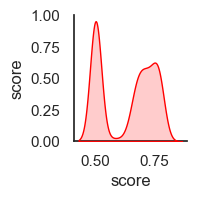


optimizing_time (min) = 4.0


In [67]:
# Initiating
t1 = time.time()

### Optimizing by G.A.
Pop_Size, Gens, Tours, Crossover, Mutation = 500,2,1500, .30,.60 
Search_Space_Features   = [ 'score' ]
Best_Params, Top_Params = GA_Search(CATs,TFs,INTs,CONTs,ESTIMATOR,CV,Search_Space_Features,SCORING,
                                    Pop_Size,Gens,Tours,Crossover,Mutation,
                                    X_Train_Scaled, y_Train, X_Valid_Scaled, y_Valid )

t2 = time.time()
dt = np.round( (t2-t1)/60, 0 )
print( '\noptimizing_time (min) =', dt )

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Making DTree

In [75]:
DTree = DecisionTreeClassifier(
    splitter='best', criterion='log_loss', max_features=None, max_depth=4, max_leaf_nodes=13,
    ccp_alpha=0.00910226805408365, min_samples_leaf=0.0027485377033029034, min_samples_split=0.0022476517962994325,
    min_impurity_decrease=0.005714296619213639, min_weight_fraction_leaf=0.015314697914714633,
    class_weight={1:CLASS_WEIGHT}, random_state=RANDOM_STATE 
                               ).fit( X_Train_Scaled, y_Train )

pickle.dump( DTree,  open('DTree','wb') )  # save
DTree = pickle.load( open('DTree','rb') )  # load

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Plotting DTree
 - Install the following libraries:
    - pip install pydotplus
    - conda install graphviz

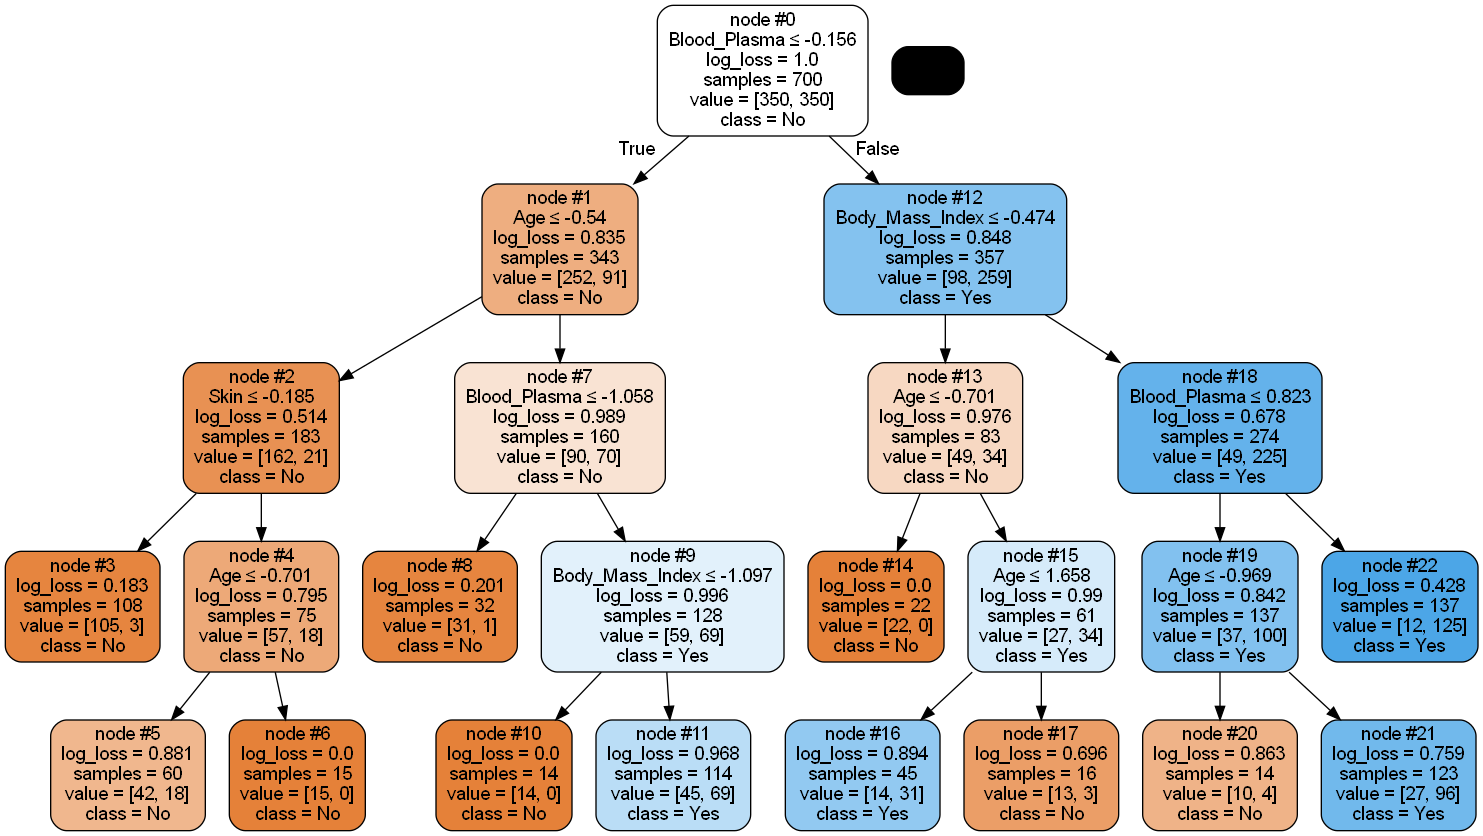

In [69]:
# Old Method (Simple, But Depricated)
''' 
plt.figure( figsize=(14,6) )
plot_tree(  decision_tree  =  DTree
         ,  filled         =  True
         ,  rounded        =  True
         ,  fontsize       =  9
         ,  precision      =  1
         ,  class_names    =  ['No','Yes']
         ,  feature_names  =  X_Train_Scaled.columns 
         ) 
plt.savefig( 'DTree_Plot.png',  dpi=120 )
plt.show() 
''' 

# New Method (Hard, But Modern)
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO
from IPython.display       import Image
from sklearn.tree          import export_graphviz
import pydotplus 

dot_data = StringIO()
export_graphviz( DTree, feature_names=X_Train_Scaled.columns,  special_characters=True,  class_names=['No','Yes'],
                 out_file=dot_data,  filled=True,  rounded=True,  node_ids=True )
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('DTree.png')   # Saving as png
graph.write_pdf('DTree.pdf')   # Saving as pdf

# Generate .png image of "Decision Tree"
Image( graph.create_png() )

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Comparing DTree with BaseLine on Validation Data

In [74]:
y_Pred_DTree = DTree.predict( X_Valid_Scaled )
DTree_Report = classification_report( y_Valid, y_Pred_DTree )
print( '\nDTree\n', DTree_Report )

print( '\nDTree_BaseLine\n', DTree_BaseLine_Report )


DTree
               precision    recall  f1-score   support

           0       0.82      0.63      0.71        75
           1       0.52      0.75      0.61        40

    accuracy                           0.67       115
   macro avg       0.67      0.69      0.66       115
weighted avg       0.72      0.67      0.68       115


DTree_BaseLine
               precision    recall  f1-score   support

           0       0.73      0.72      0.72        75
           1       0.49      0.50      0.49        40

    accuracy                           0.64       115
   macro avg       0.61      0.61      0.61       115
weighted avg       0.65      0.64      0.64       115



<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - By Optimization:
    - **Precision** of **Class 0** Improved **+4 %**
    - **Precision** of **Class 1** Improved **+4 %**
    - **Recall** of **Class 0** Improved **0 %**
    - **Recall** of **Class 1** Improved **+9 %**
    - **Accuracy** of **Model** Improved **+3 %**
****
 - Accuracy, Recall or Precision **< 80%** and need Boosting.

** **

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Gradient Boosting 

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Preparing Hyper-Parameters

In [72]:
# Needed Data
N_SPLITS = 10

# cross-validation strategy
CV = StratifiedKFold( n_splits=N_SPLITS, shuffle=True )

# (auto)
nClasses = len( df_clean[estimated_column].astype('str').unique() )
if nClasses == 2:
    LOSS_VALUES = ['log_loss','exponential']
else:
    LOSS_VALUES = ['log_loss']

# Hyper Parameters
CATs  = [ ['loss'        ,      LOSS_VALUES                 ]   
        , ['criterion'   , ['friedman_mse','squared_error'] ] 
        , ['max_features', ['sqrt','log2',None]             ]  
        ]
TFs   = [ ['warm_start']
        ]
INTs  = [ ['max_depth'     ,            1,  15, 15          ]
        , ['max_leaf_nodes',            2,  16, 15          ]
        , ['n_estimators'  ,            5, 101, 97          ]
        ,   
        ]
CONTs = [ [ 'tol'                     ,   1e-3, 1.0, 4,   'log-uniform' ]
        , [ 'ccp_alpha'               ,   1e-3, 1.0, 4,   'log-uniform' ]
        , [ 'subsample'               ,   1e-3, 1.0, 4,   'log-uniform' ]
        , [ 'learning_rate'           ,   1e-3, 0.3, 4,   'log-uniform' ]
        , [ 'min_samples_leaf'        ,   1e-3, 1.0, 4,   'log-uniform' ]
        , [ 'min_samples_split'       ,   1e-3, 1.0, 4,   'log-uniform' ]
        , [ 'min_impurity_decrease'   ,   1e-3, 1.0, 4,   'log-uniform' ]
        , [ 'min_weight_fraction_leaf',   1e-3, 0.5, 4,   'log-uniform' ]
        ]

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Tuning Hyper-Parameters

initiating ...


  0%|          | 0/3 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	200   	0.763429	0.0303241  	0.797143   	0.577143   
1  	354   	0.798479	0.00265375 	0.8        	0.792857   
2  	361   	0.815336	0.0032403  	0.817143   	0.807143   


Best Parameters: {'loss': 'exponential', 'criterion': 'friedman_mse', 'max_features': 'sqrt', 'warm_start': True, 'max_depth': 15, 'max_leaf_nodes': 11, 'n_estimators': 34, 'tol': 0.03714672463925013, 'ccp_alpha': 0.0018269715079550443, 'subsample': 0.568271520205717, 'learning_rate': 0.04537202937412656, 'min_samples_leaf': 0.017651468847492358, 'min_samples_split': 0.03137203929639306, 'min_impurity_decrease': 0.14695670115656753, 'min_weight_fraction_leaf': 0.015398365634094493}
accuracy = 0.6869565217391305


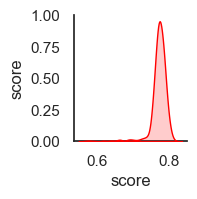


optimizing_time (min) = 9.0


In [73]:
# (manual)
INIT = DTree
#N_ESTIMATORS = 50

Pop_Size, Gens, Tours, Crossover, Mutation = 200,2,600, .30,.60 
Search_Space_Features = [ 'score' ]

# (auto)
# Initiating
t1 = time.time()
# General Estimator 
ESTIMATOR  =  GradientBoostingClassifier( init                = DTree
                                        #, n_estimators        = N_ESTIMATORS
                                        , random_state        = RANDOM_STATE
                                        , verbose             = 0
                                        , n_iter_no_change    = None
                                        , validation_fraction = 0.1 
                                        )   
Best_Params, Top_Params = GA_Search( CATs,TFs,INTs,CONTs, ESTIMATOR, CV, Search_Space_Features, SCORING,
                                     Pop_Size,Gens,Tours,Crossover,Mutation, 
                                     X_Train_Scaled, y_Train, X_Valid_Scaled, y_Valid )
t2 = time.time()
dt = np.round( (t2-t1)/60, 0 )
print( '\noptimizing_time (min) =', dt )

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Making Gradient Boosted Decision Tree

In [76]:
DTree_GrBoosted = GradientBoostingClassifier( init=DTree,
    loss='exponential', criterion='friedman_mse', max_features='sqrt', warm_start=True, max_depth=15, max_leaf_nodes=11,
    n_estimators=34, tol=0.03714672463925013, ccp_alpha=0.0018269715079550443, subsample=0.568271520205717, 
    learning_rate=0.04537202937412656, min_samples_leaf=0.017651468847492358, min_samples_split=0.03137203929639306, 
    min_impurity_decrease=0.14695670115656753, min_weight_fraction_leaf=0.015398365634094493,
    random_state=RANDOM_STATE, verbose=0, n_iter_no_change=None, validation_fraction=0.1 
                                             ).fit( X_Train_Scaled, y_Train )

pickle.dump( DTree_GrBoosted,  open('DTree_GrBoosted','wb') )  # save
DTree_GrBoosted = pickle.load( open('DTree_GrBoosted','rb') )  # load

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Comparing Gradient Boosted Decision Tree with BaseLine on Validation Data

In [77]:
y_Pred = DTree_GrBoosted.predict( X_Valid_Scaled )
DTree_GrBoosted_Report = classification_report( y_Valid, y_Pred )
print( '\nDTree_GrBoosted\n', DTree_GrBoosted_Report )

print( '\nDTree\n'          , DTree_Report           )
print( '\nDTree_BaseLine\n' , DTree_BaseLine_Report  )


DTree_GrBoosted
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        75
           1       0.54      0.75      0.63        40

    accuracy                           0.69       115
   macro avg       0.68      0.70      0.68       115
weighted avg       0.73      0.69      0.69       115


DTree
               precision    recall  f1-score   support

           0       0.82      0.63      0.71        75
           1       0.52      0.75      0.61        40

    accuracy                           0.67       115
   macro avg       0.67      0.69      0.66       115
weighted avg       0.72      0.67      0.68       115


DTree_BaseLine
               precision    recall  f1-score   support

           0       0.73      0.72      0.72        75
           1       0.49      0.50      0.49        40

    accuracy                           0.64       115
   macro avg       0.61      0.61      0.61       115
weighted avg       0.65      0.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - By Optimization:
    - **Precision** of **Class 0** Improved **+2 %**
    - **Precision** of **Class 1** Improved **+15 %**
    - **Recall** of **Class 0** Improved **+10 %**
    - **Recall** of **Class 1** Improved **0 %**
    - **Accuracy** of **Model** Improved **+6 %**

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Adaptive Boosting 

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Preparing Hyper-Parameters

In [79]:
# Needed Data
N_SPLITS = 10

# cross-validation strategy
CV = StratifiedKFold( n_splits=N_SPLITS, shuffle=True )

# (auto) 
# Hyper Parameters
CATs  = [ ['algorithm'     ,        ['SAMME.R','SAMME']        ]   
        ]
TFs   = [ 
        ]
INTs  = [ ['n_estimators'  ,             5, 101, 97            ]
        ]
CONTs = [ [ 'learning_rate',   1e-3, 0.3, 4,   'log-uniform'   ] 
        ]

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Tuning Hyper-Parameters

initiating ...


  0%|          | 0/3 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	200   	0.790357	0.0119016  	0.818571   	0.755714   
1  	359   	0.822614	0.00101126 	0.822857   	0.817143   
2  	355   	0.825714	4.15407e-17	0.825714   	0.825714   


Best Parameters: {'algorithm': 'SAMME.R', 'n_estimators': 64, 'learning_rate': 0.054921060854881416}
accuracy = 0.6869565217391305


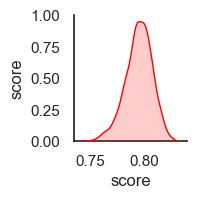


optimizing_time (min) = 37.0


In [80]:
# (manual)
INIT = DTree
#N_ESTIMATORS = 50

Pop_Size, Gens, Tours, Crossover, Mutation = 200,2,600, .30,.60 
Search_Space_Features = [ 'score' ]

# (auto)
# Initiating
t1 = time.time()
# General Estimator 
ESTIMATOR  =  AdaBoostClassifier( estimator    = INIT
                                #,n_estimators = N_ESTIMATORS
                                , random_state = RANDOM_STATE  
                                )   
Best_Params, Top_Params = GA_Search( CATs,TFs,INTs,CONTs, ESTIMATOR, CV, Search_Space_Features, SCORING,
                                     Pop_Size,Gens,Tours,Crossover,Mutation, 
                                     X_Train_Scaled, y_Train, X_Valid_Scaled, y_Valid )
t2 = time.time()
dt = np.round( (t2-t1)/60, 0 )
print( '\noptimizing_time (min) =', dt )

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Making Adaptive Boosted Decision Tree

In [81]:
DTree_AdaBoosted = AdaBoostClassifier( estimator=DTree, random_state=RANDOM_STATE,
    algorithm='SAMME.R', n_estimators=64, learning_rate=0.054921060854881416,
                                     ).fit( X_Train_Scaled, y_Train )

pickle.dump( DTree_AdaBoosted,  open('DTree_AdaBoosted','wb') )  # save
DTree_AdaBoosted = pickle.load( open('DTree_AdaBoosted','rb') )  # load

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Comparing Adaptive Boosted Decision Tree with BaseLine on Validation Data

In [83]:
y_Pred = DTree_AdaBoosted.predict( X_Valid_Scaled )
DTree_AdaBoosted_Report = classification_report( y_Valid, y_Pred )
print( '\nDTree_AdaBoosted\n', DTree_AdaBoosted_Report )

print( '\nDTree_GrBoosted\n' , DTree_GrBoosted_Report  )
print( '\nDTree\n'           , DTree_Report            )
print( '\nDTree_BaseLine\n'  , DTree_BaseLine_Report   )


DTree_AdaBoosted
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        75
           1       0.54      0.72      0.62        40

    accuracy                           0.69       115
   macro avg       0.68      0.70      0.68       115
weighted avg       0.72      0.69      0.69       115


DTree_GrBoosted
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        75
           1       0.54      0.75      0.63        40

    accuracy                           0.69       115
   macro avg       0.68      0.70      0.68       115
weighted avg       0.73      0.69      0.69       115


DTree
               precision    recall  f1-score   support

           0       0.82      0.63      0.71        75
           1       0.52      0.75      0.61        40

    accuracy                           0.67       115
   macro avg       0.67      0.69      0.66       115
weighted avg       0.72      

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - By Optimization:
    - **Precision** of **Class 0** Improved **+8 %**
    - **Precision** of **Class 1** Improved **+9 %**
    - **Recall** of **Class 0** Improved **+1 %**
    - **Recall** of **Class 1** Improved **+19 %**
    - **Accuracy** of **Model** Improved **+7 %**

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Making Stacker

In [105]:
level0 = list()
#level0.append(( 'DTree_BaseLine'    , DTree_BaseLine     ))
level0.append(( 'DTree'             , DTree              )) 
level0.append(( 'DTree_GrBoosted'   , DTree_GrBoosted    ))
#level0.append(( 'DTree_AdaBoosted'  , DTree_AdaBoosted   ))  

# define meta learner model
level1  =  LogisticRegression()

# define the stacking ensemble
DTree_Stacker =  StackingClassifier( estimators=level0, final_estimator=level1, cv=10, 
                                     passthrough=True,  stack_method='predict_proba' 
                                   ).fit( X_Train_Scaled, y_Train )

pickle.dump( DTree_Stacker,  open('DTree_Stacker','wb') )  # save
DTree_Stacker = pickle.load( open('DTree_Stacker','rb') )  # load

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Comparing Stacker Decision Tree with BaseLine on Validation Data

In [106]:
y_Pred = DTree_Stacker.predict( X_Valid_Scaled )
DTree_Stacker_Report = classification_report( y_Valid, y_Pred )
print( '\nDTree_Stacker\n'   , DTree_Stacker_Report    )

print( '\nDTree_AdaBoosted\n', DTree_AdaBoosted_Report )
print( '\nDTree_GrBoosted\n' , DTree_GrBoosted_Report  )
print( '\nDTree\n'           , DTree_Report            )
print( '\nDTree_BaseLine\n'  , DTree_BaseLine_Report   )


DTree_Stacker
               precision    recall  f1-score   support

           0       0.83      0.72      0.77        75
           1       0.58      0.72      0.64        40

    accuracy                           0.72       115
   macro avg       0.71      0.72      0.71       115
weighted avg       0.74      0.72      0.73       115


DTree_AdaBoosted
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        75
           1       0.54      0.72      0.62        40

    accuracy                           0.69       115
   macro avg       0.68      0.70      0.68       115
weighted avg       0.72      0.69      0.69       115


DTree_GrBoosted
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        75
           1       0.54      0.75      0.63        40

    accuracy                           0.69       115
   macro avg       0.68      0.70      0.68       115
weighted avg       0.

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Making Voter

In [101]:
level0 = list()
#level0.append(( 'DTree_BaseLine'    , DTree_BaseLine     ))
#level0.append(( 'DTree'             , DTree              )) 
level0.append(( 'DTree_GrBoosted'   , DTree_GrBoosted    ))
level0.append(( 'DTree_AdaBoosted'  , DTree_AdaBoosted   ))  

# define meta learner model
level1  =  LogisticRegression()

# define the votinging ensemble
DTree_Voter = VotingClassifier( estimators=level0, voting='soft' ).fit( X_Train_Scaled, y_Train ) 

pickle.dump( DTree_Voter,  open('DTree_Voter','wb') )  # save
DTree_Voter = pickle.load( open('DTree_Voter','rb') )  # load

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Comparing Stacker Decision Tree with BaseLine on Validation Data

In [107]:
y_Pred = DTree_Voter.predict( X_Valid_Scaled )
DTree_Voter_Report = classification_report( y_Valid, y_Pred )
print( '\nDTree_Voter\n'   , DTree_Voter_Report    )

print( '\nDTree_AdaBoosted\n', DTree_AdaBoosted_Report )
print( '\nDTree_GrBoosted\n' , DTree_GrBoosted_Report  )
print( '\nDTree\n'           , DTree_Report            )
print( '\nDTree_BaseLine\n'  , DTree_BaseLine_Report   )


DTree_Voter
               precision    recall  f1-score   support

           0       0.84      0.68      0.75        75
           1       0.56      0.75      0.64        40

    accuracy                           0.70       115
   macro avg       0.70      0.72      0.69       115
weighted avg       0.74      0.70      0.71       115


DTree_AdaBoosted
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        75
           1       0.54      0.72      0.62        40

    accuracy                           0.69       115
   macro avg       0.68      0.70      0.68       115
weighted avg       0.72      0.69      0.69       115


DTree_GrBoosted
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        75
           1       0.54      0.75      0.63        40

    accuracy                           0.69       115
   macro avg       0.68      0.70      0.68       115
weighted avg       0.73

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.7em; color:#00b3e5;"> Checking Accuracy, Recall and Precision of Estimators on Validation Data

In [108]:
ESTIMATORS = [  DTree_BaseLine ,  DTree ,  DTree_GrBoosted ,  DTree_AdaBoosted , 
                DTree_Stacker  ,  DTree_Voter  ]
LABELS     = [ 'DTree_BaseLine', 'DTree', 'DTree_GrBoosted', 'DTree_AdaBoosted',
               'DTree_Stacker' , 'DTree_Voter' ]

ACCURACIS, RECALLS, PRECISIONS = [],[],[]

for estimator in ESTIMATORS:
    y_pred  = estimator.predict( X_Valid_Scaled )
    
    A_Score =  accuracy_score(y_Valid, y_pred,        normalize=True        )
    R_Score =    recall_score(y_Valid, y_pred, average=None, zero_division=1)  
    P_Score = precision_score(y_Valid, y_pred, average=None, zero_division=1)
    
    A_Score=np.round(A_Score*100,0);   ACCURACIS.append(A_Score)
    R_Score=np.round(R_Score*100,0);     RECALLS.append(R_Score)
    P_Score=np.round(P_Score*100,0);  PRECISIONS.append(P_Score)
    
Estimators_ARP = pd.DataFrame([ACCURACIS,RECALLS,PRECISIONS]).T
Estimators_ARP.columns = [ 'Accuracy','Recalls','Precisions' ]
Estimators_ARP.index   = LABELS

cm = sns.light_palette('#ffcccb', as_cmap=True)
Estimators_ARP.style.background_gradient(subset=['Accuracy'], cmap=cm).format(precision=1)

,Accuracy,Recalls,Precisions
DTree_BaseLine,64.0,[72. 50.],[73. 49.]
DTree,67.0,[63. 75.],[82. 52.]
DTree_GrBoosted,69.0,[65. 75.],[83. 54.]
DTree_AdaBoosted,69.0,[67. 72.],[82. 54.]
DTree_Stacker,72.0,[72. 72.],[83. 58.]
DTree_Voter,70.0,[68. 75.],[84. 56.]


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report
 - Considering the recall, **DTree_Voter** is the best estimator 

** **

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Comparing The Performance of Estimators on Test Data

                      Mean     SD       95% CI
>     DTree_BaseLine  0.712  (0.126)  [0.46 0.96]
>              DTree  0.744  (0.135)  [0.48 1.01]
>    DTree_GrBoosted  0.739  (0.135)  [0.47 1.01]
>   DTree_AdaBoosted  0.751  (0.106)  [0.54 0.96]
>      DTree_Stacker  0.750  (0.125)  [0.50 1.00]
>        DTree_Voter  0.761  (0.102)  [0.56 0.96]


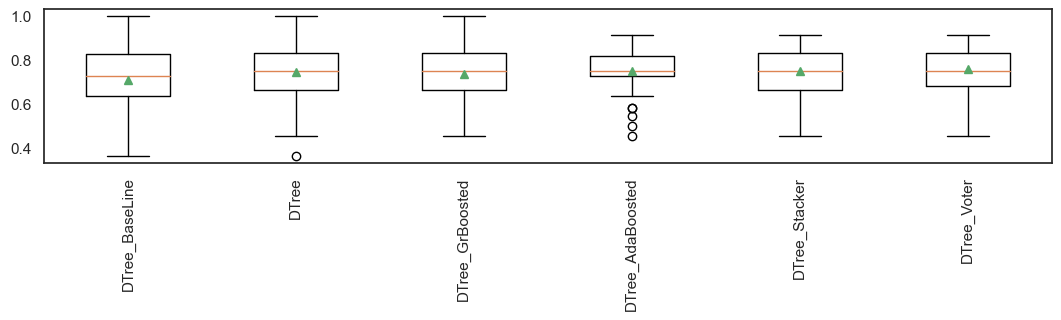

In [110]:
models = dict() 
models['DTree_BaseLine'    ] = DTree_BaseLine
models['DTree'             ] = DTree
models['DTree_GrBoosted'   ] = DTree_GrBoosted
models['DTree_AdaBoosted'  ] = DTree_AdaBoosted 
models['DTree_Stacker'     ] = DTree_Stacker
models['DTree_Voter'       ] = DTree_Voter
 

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=RANDOM_STATE)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

results, names = list(), list()
print('                      Mean     SD       95% CI') 
for name, model in models.items():
    scores = evaluate_model( model, X_Test_Scaled, y_Test )
    results.append(scores)
    names.append(name)
    print('>%19s  %.3f  (%.3f)  [%.2f %.2f]' % (name, mean(scores), std(scores), mean(scores)-2*std(scores), mean(scores)+2*std(scores)   ))
    
# plot model performance for comparison
plt.boxplot( results, labels=names, showmeans=True ); plt.xticks(rotation=90); plt.grid(False); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report
 - **DTree_Voter** performed just fine.

** **

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Evaluating DTree_AdaBoosted

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Visualizing

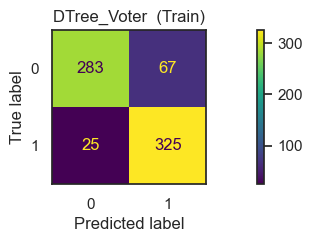

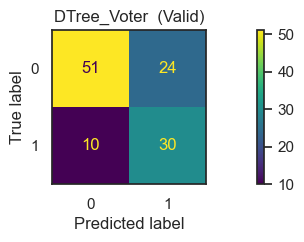

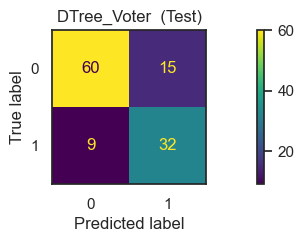

In [111]:
Classes  = ['0','1']
CLF      =  DTree_Voter
CLF_Name = 'DTree_Voter'

# Training Performance
figure = ConfusionMatrixDisplay.from_estimator( CLF, X_Train_Scaled, y_Train, display_labels=Classes )
plt.title( CLF_Name+'  (Train)' ); plt.show()

# Valid Performance   
disp = ConfusionMatrixDisplay.from_estimator( CLF, X_Valid_Scaled, y_Valid, display_labels=Classes  )
plt.title( CLF_Name+'  (Valid)' ); plt.show()

# Test Performance
disp = ConfusionMatrixDisplay.from_estimator( CLF, X_Test_Scaled,  y_Test,  display_labels=Classes  )
plt.title( CLF_Name+'  (Test)' ); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Comparing DTree_Voter with BaseLine on Test Data

In [112]:
y_Pred = CLF.predict( X_Test_Scaled )
Report = classification_report( y_Test, y_Pred )
print( '\n'+CLF_Name,  '\n', Report )

y_Pred = DTree_BaseLine.predict( X_Test_Scaled )
Report = classification_report( y_Test, y_Pred )
print( '\nDTree_BaseLine\n', Report )


DTree_Voter 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83        75
           1       0.68      0.78      0.73        41

    accuracy                           0.79       116
   macro avg       0.78      0.79      0.78       116
weighted avg       0.80      0.79      0.80       116


DTree_BaseLine
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        75
           1       0.62      0.56      0.59        41

    accuracy                           0.72       116
   macro avg       0.70      0.69      0.69       116
weighted avg       0.72      0.72      0.72       116



##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report:
 - Compared to BaseLine:
 
   - **precision** of class 0 **improved +11%**
   - **precision** of class 1 **improved +6%**
    
   - **recall** of class 0 **improved -4%**
   - **recall** of class 1 **improved +25%**
   
   - **accuracy improved +6%**
**  **
 - Justification: As the Optimized Estimator is the fruit of **Cross-Validation** and **Adaptive-Boosting**, it is more **Reliable** than the BaseLine.

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Saving Estimators To Disk

In [113]:
ESTIMATORS       = [  DTree_BaseLine ,  DTree ,  DTree_GrBoosted ,  DTree_AdaBoosted ,  DTree_Stacker ,  DTree_Voter  ]
ESTIMATORS_Names = [ 'DTree_BaseLine', 'DTree', 'DTree_GrBoosted', 'DTree_AdaBoosted', 'DTree_Stacker', 'DTree_Voter' ]

for i in range( len(ESTIMATORS) ):
    Estimator        = ESTIMATORS[ i ]
    Destination_File = ESTIMATORS_Names[ i ]+'.sav'
    pickle.dump( Estimator, open(Destination_File,'wb') )

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Estimators From Disk

In [114]:
DTree_BaseLine   = pickle.load( open( 'DTree_BaseLine.sav'  ,'rb') )
DTree            = pickle.load( open( 'DTree.sav'           ,'rb') ) 
DTree_GrBoosted  = pickle.load( open( 'DTree_GrBoosted.sav' ,'rb') )
DTree_AdaBoosted = pickle.load( open( 'DTree_AdaBoosted.sav','rb') )
DTree_Stacker    = pickle.load( open( 'DTree_Stacker.sav'   ,'rb') )
DTree_Voter      = pickle.load( open( 'DTree_Voter.sav'     ,'rb') )

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Making The Final Estimator

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Checkig Range of Features

In [115]:
round( X_Train.describe().T[['min','max']], 3 )

,min,max
Blood_Plasma,44.0,199.0
Test,14.0,440.0
Body_Mass_Index,18.2,52.9
Skin,7.0,56.0
Age,21.0,68.0
Pregnancy,0.0,13.0
Blood_Pressure,38.0,108.0


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Choosing A Random Record To Be Predicted

In [116]:
# choosing a record in the test data set to be predicted
record_number = 10

print( np.round( X_Test.iloc[ record_number, : ], 1 ) )
print( '\nExpected_Class = ', y_Test[ record_number ] )

Blood_Plasma       117.0
Test               120.0
Body_Mass_Index     33.2
Skin                27.0
Age                 24.0
Pregnancy            4.0
Blood_Pressure      64.0
Name: 10, dtype: float64

Expected_Class =  0


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Entering The Record of Interest and Acceptable Range

In [117]:
# input data                R  a  n  g  e  

Blood_Plasma    = 166.0     # 61.0  199.0
Test            = 175.0     # 14.0  465.0
Body_Mass_Index =  25.8     # 18.2   52.9
Skin            =  19.0     #  7.0   56.0
Age             =  51.0     # 21.0   68.0
Pregnancy       =   5.0     #  0.0   13.0
Blood_Pressure  =  72.0     # 38.0  108.0

#Class          =   1.0    

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Predicting 

In [120]:
# x 
x = X_Train.copy()

# s  written in the same order as  X_Train
s = [ Test, Blood_Plasma, Age, Skin, Pregnancy, Body_Mass_Index, Blood_Pressure ]

# encode_columns
encode_columns = [] 

def predicted_class( s, x, encode_columns ):
    s  = pd.DataFrame( [s.copy(),s.copy()], columns=x.columns )
    sx = pd.concat( [s,x], axis=0 )
    sx_encoded = pd.get_dummies(
          sx
        , columns = encode_columns
        )
    sx_encoded = sx_encoded.iloc[[0,1],:] 
    sx_scaled  = pd.DataFrame( Scaler.transform(sx_encoded), columns=sx_encoded.columns ) 
    
    Estimator_Name, pred = [], [] 
    for key, value in models.items():
        clf = value
        Estimation = clf.predict( sx_scaled )[0]
        pred.append( Estimation ) 
        Estimator_Name.append( key )
        
    df_pred = pd.DataFrame( [pred] ).T
    df_pred.columns = ['Predicted Class']
    df_pred.index   = Estimator_Name
    
    return df_pred 

# Predicting
df_pred = predicted_class( s, x, encode_columns )
df_pred

,Predicted Class
DTree_BaseLine,1
DTree,1
DTree_GrBoosted,1
DTree_AdaBoosted,1
DTree_Stacker,1
DTree_Voter,1


#####   

#####   